In [ ]:
!pip install tensorflow
!pip install keras
!pip install pillow

In [13]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

# 필요 라이브러리 호출
import numpy
import tensorflow as tf

# 데이터 셋 호출
from keras.datasets import mnist

# 실행 시마다 같은 결과값 도출을 위한 시드 설정
#numpy.random.seed(0)
#tf.random.set_seed(0)



# 데이터를 불러와서 각 변수에 저장
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 학습에 적합한 형태로 데이터 가공
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
print(X_train)

# 클래스를 학습에 이용하기 위해 데이터 가공
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 딥러닝 모델 구조 설정(2개층, 512개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값, relu와 softmax 활성화 함수 이용)
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 딥러닝 구조 설정(loss 옵션을 다중 클래스에 적합한 categorical_crossentropy, 옵티마이저는 adam 설정)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 모델 실행(X_test, Y_test로 검증, 200개씩 30번 학습)
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=2)

# 학습 정확도, 검증 정확도 출력
print('\nAccuracy: {:.4f}'.format(model.evaluate(X_train, Y_train)[1]))
print('\nVal_Accuracy: {:.4f}'.format(model.evaluate(X_test, Y_test)[1]))

# 모델 저장
model.save('handwriting_model.h5')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/30
300/300 - 3s - loss: 0.3057 - accuracy: 0.9135 - val_loss: 0.1584 - val_accuracy: 0.9553 - 3s/epoch - 11ms/step
Epoch 2/30
300/300 - 3s - loss: 0.1259 - accuracy: 0.9638 - val_loss: 0.1060 - val_accuracy: 0.9677 - 3s/epoch - 10ms/step
Epoch 3/30
300/300 - 3s - loss: 0.0837 - accuracy: 0.9757 - val_loss: 0.0843 - val_accuracy: 0.9740 - 3s/epoch - 10ms/step
Epoch 4/30
300/300 - 3s - loss: 0.0598 - accuracy: 0.9829 - val_loss: 0.0709 - val_accuracy: 0.9791 - 3s/epoch - 10ms/step
Epoch 5/30
300/300 - 2s - loss: 0.0448 - accuracy: 0.9874 - val_loss: 0.0726 - val_accuracy: 0.9779 - 2s/epoch - 8ms/step
Epoch 6/30
300/300 - 3s - loss: 0.0343 - accuracy: 0.9904 - val_loss: 0.0677 - val_accuracy: 0.9776 - 3s/epoch - 9ms/step
Epoch 7/30
300/300 - 3s - loss: 0.0263 - accuracy: 0.9929 - val_loss: 0.0635 - val_accuracy: 0.9785 - 3s/epo

In [15]:
# 모델 저장
model.save('handwriting_model.h5')

# 모델 로드
from tensorflow.keras.models import load_model

model = load_model('handwriting_model.h5')

In [17]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.models import load_model
from keras.utils import np_utils

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# test.png는 그림판에서 붓으로 숫자 8을 그린 이미지 파일
# test.png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("test_77.png").convert("L")

# 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# 데이터를 모델에 적용할 수 있도록 가공
test_data = ((np.array(img) / 255) - 1) * -1

# 모델 불러오기
model = load_model('handwriting_model.h5')

# 클래스 예측 함수에 가공된 테스트 데이터 넣어 결과 도출
res =(model.predict(test_data) > 0.5).astype("int32")

print(res)
np.argmax(res)

1/1 [==============================] - 0s 69ms/step
[[0 0 0 0 0 1 0 0 0 0]]


5

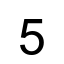

In [18]:
from PIL import Image, ImageDraw, ImageFont

# 텍스트와 이미지 크기, 폰트 설정
text = str(np.argmax(res))
image_size = (64, 64)
font_size = 50
font = ImageFont.truetype('ARIAL.TTF', font_size)

# 이미지 생성
image = Image.new("RGB", image_size, color=(255, 255, 255))
draw = ImageDraw.Draw(image)


# 텍스트 위치 계산
text_size = draw.textsize(text, font=font)
text_position = ((image_size[0] - text_size[0]) / 2, (image_size[1] - text_size[1]) / 2)

# 이미지에 텍스트 추가
draw.text(text_position, text, font=font, fill=(0, 0, 0))

# 이미지 저장
image.save("text_image.png")


from IPython.display import Image
Image(filename='text_image.png')